### Imports

In [1]:
# import public packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Rectangle
import scipy
import mne
import sys


from mne.time_frequency import tfr_morlet
from mne.baseline import rescale
from scipy.signal import spectrogram, hann, butter, filtfilt
from scipy import signal, interpolate
from scipy.interpolate import make_interp_spline, BSpline
from io import open
from importlib import reload

# import own functions
from utils import find_folders
import dat_preproc
import fix_annot_onsets
import mat2fif

### Add Directories / Load Files

In [2]:
#reload(find_folders)
onedrive = find_folders.get_onedrive_path()
ftg_path = find_folders.get_onedrive_path("FTG")
print(ftg_path)

/Users/barbaramathiopoulou/OneDrive - Charité - Universitätsmedizin Berlin/FTG_PROJECT


In [3]:
percept_ID = 'sub029'
fname = 'sub-029_ses-EphysMedOn01_task-Bilateral_acq-StimOnR2b_run-01_ieeg.mat'

raw = mne.io.read_raw_fieldtrip(
    os.path.join(
        ftg_path,
        'data',
        'raw_data',
        'raw_mats',
        percept_ID,
        fname
    ),
    info = None
)

/opt/anaconda3/lib/python3.7/site-packages/mne/externals/pymatreader/utils.py:213: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Creating RawArray with float64 data, n_channels=6, n_times=87875
    Range : 0 ... 87874 =      0.000 ...   351.496 secs
Ready.


<ipython-input-3-e3f5ee095d35>:13: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  info = None
<ipython-input-3-e3f5ee095d35>:13: RuntimeWarning: 4 channel names are too long, have been truncated to 15 characters:
['LFP_Stn_L_13_PEAK66Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_13_PEAK73Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us']
  info = None
<ipython-input-3-e3f5ee095d35>:13: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  info = None
<ipython-input-3-e3f5ee095d35>:13: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_13. Making it a MISC channel.
  info = None
<ipython-input-3-e3f5ee095d35>:13: RuntimeWarning: Cannot guess the correct type of channel LFP_S

#### Artefact Rejection & FIF Files

In [4]:
#Interactive plot for artefact rejection
%matplotlib qt 
raw.plot()
'''
fig = raw.plot(n_channels = 2, highpass = 5, lowpass = 100, 
    filtorder = 5, duration = 20)
'''

'\nfig = raw.plot(n_channels = 2, highpass = 5, lowpass = 100, \n    filtorder = 5, duration = 20)\n'

In [6]:
#First time making them
interactive_annot = raw.annotations
raw.annotations.save('Sub029_Bilateral_artefactsAnnotations.csv', 
    overwrite = True)

In [9]:
#Importing them later
interactive_annot = pd.read_csv(
    os.path.join(
        ftg_path,
        'data',
        'raw_data',
        'clean_fifs',
        'sub029',
        'Sub029_Bilateral_artefactsAnnotations.csv'
    )
)

#fix timing in imported annotations
reload(fix_annot_onsets)
new_onsets = fix_annot_onsets.fix_annot_onsets(interactive_annot)
print(new_onsets)

[ 24.6  65.6  81.8  94.9 108.4 113.2 187.2 209.2 245.8 271.8 294.3 333.4
 335.4 338.7 340.8 343.8 349.6]


In [10]:
my_annot = mne.Annotations(onset=new_onsets,  # in seconds
                           duration=interactive_annot.duration,  # in seconds, too
                           description=interactive_annot.description,
                           orig_time=raw.info['meas_date'])

reload(mat2fif)
%matplotlib qt
new_raw = mat2fif.mat2fif(raw,my_annot)

Omitting 5598 of 87875 (6.37%) samples, retaining 82277 (93.63%) samples.
Creating RawArray with float64 data, n_channels=6, n_times=82277
    Range : 0 ... 82276 =      0.000 ...   329.104 secs
Ready.


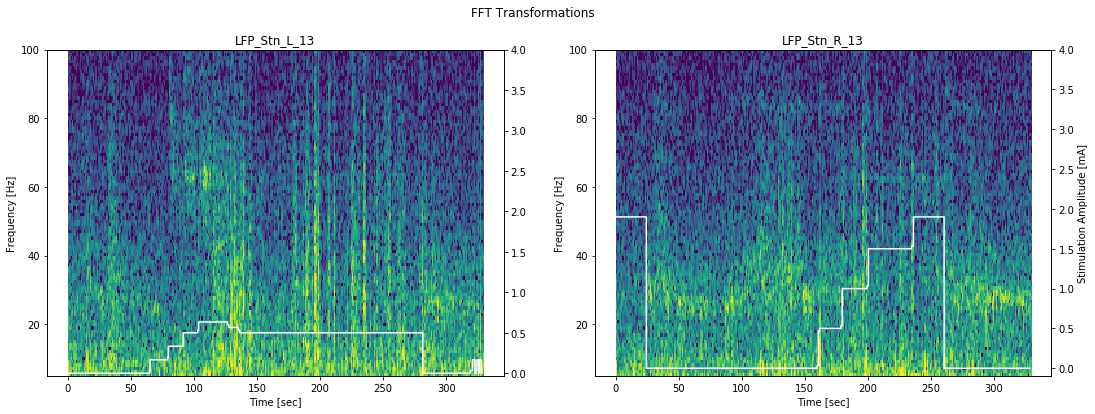

In [27]:
#Plot TF plot with artefact rejected data
%matplotlib qt
reload(dat_preproc)
x = new_raw.get_data(reject_by_annotation = 'omit',picks=[0,1])
raw = new_raw
win_samp = 250
noverlap = 0.5
window = hann(win_samp, sym=False)
f, t, Sxx = dat_preproc.fft_rawviz(raw, x, win_samp, noverlap)

### Plot Brain Sense Survey

In [172]:
raw = mne.io.read_raw_fieldtrip(
    os.path.join(
        ftg_path,
        'data',
        'raw_data',
        'raw_mats',
        "sub029",
        "sub-029_ses-EphysMedOn01_task-Rest_acq-StimOffRSegIntra_run-02_ieeg.mat"
    ),
    info = None
)

Creating RawArray with float64 data, n_channels=3, n_times=5125
    Range : 0 ... 5124 =      0.000 ...    20.496 secs
Ready.


<ipython-input-172-856c859994bb>:10: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  info = None
<ipython-input-172-856c859994bb>:10: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['LFP_Stn_R_1_A1_A', 'LFP_Stn_R_1_B1_B', 'LFP_Stn_R_1_C1_C']
  info = None
<ipython-input-172-856c859994bb>:10: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  info = None
<ipython-input-172-856c859994bb>:10: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_1_A1_A. Making it a MISC channel.
  info = None
<ipython-input-172-856c859994bb>:10: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_1_B1_B. Making it a MISC channel.
  info = None
<ip

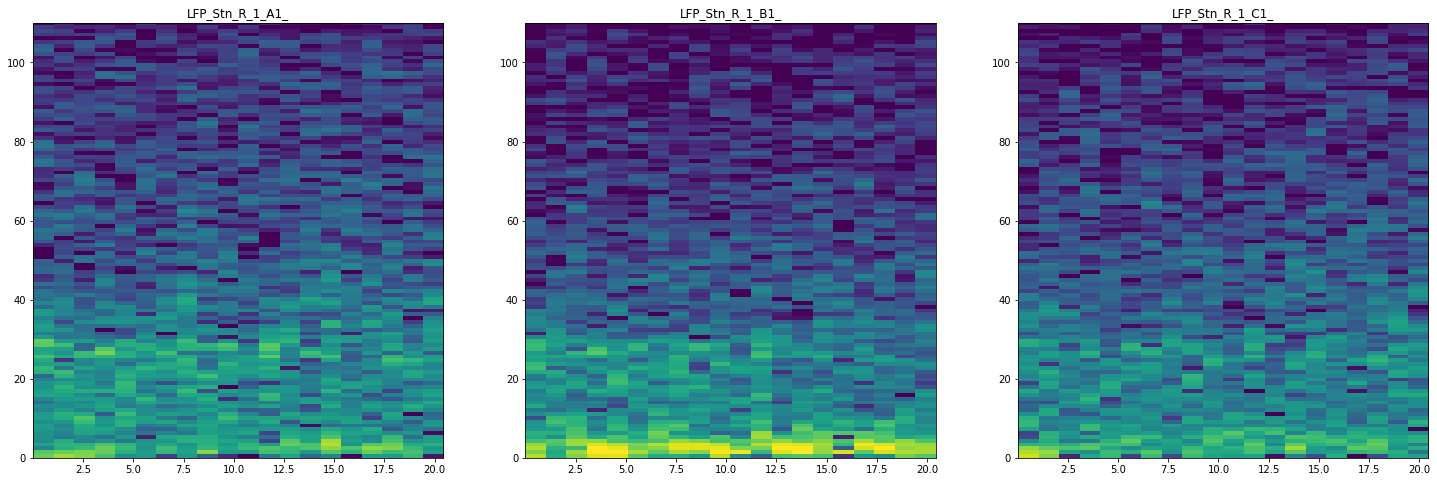

In [173]:
#reload(dat_preproc)
x = raw.get_data()
f, t, Sxx = scipy.signal.spectrogram(x = x, fs = 250, window = window, noverlap = 0.5)

%matplotlib inline
fig = plt.figure(figsize=(25, 8))

if x.shape[0] == 3:
    n_rows = 1
elif x.shape[0] == 6:
    n_rows = 2

for k in range(0,x.shape[0]):
    plt.subplot(n_rows,3,k+1)
    plt.specgram(x = x[k,:], Fs = 250, noverlap = noverlap, cmap = 'viridis', vmin = -25, vmax =20)
    plt.ylim(0,110)
    plt.title(raw.ch_names[k])


### Plot Power Spectra in epochs

In [32]:
print(ff)

[  0.   12.5  25.   37.5  50.   62.5  75.   87.5 100.  112.5 125. ]


In [67]:
%matplotlib inline
stim_onsets = [1, 30, 110, 240]
labels = ['Ipsi_Stim','NoStim','Contra_Stim','Bilateral']
dur = 20

#for l in range(0,4):
    #plt.plot(np.mean(Sxx[1,:,stim_onsets[l]:stim_onsets[l]+dur],1), label = labels[l])
    #plt.xlim(40, 90)
    #plt.ylim(0,0.5)
tt, Pxx = scipy.signal.welch(Sxx[1,1:20], fs = 250, nperseg = 250, noverlap = 0.25)
plt.plot(np.arange(1,127), np.mean(Pxx[0],1), label = labels[l])

plt.legend(labels)

IndexError: tuple index out of range

In [68]:
Pxx

array([[1.81294486e+01, 1.22285555e+02, 1.38668644e+02, ...,
        1.22637860e+02, 1.40760916e+02, 7.09169570e+01],
       [3.37626501e+01, 1.37994136e+02, 8.33757848e+01, ...,
        7.97121700e+01, 9.47836285e+01, 4.85155759e+01],
       [1.00170712e+01, 2.57685676e+01, 8.75212189e+00, ...,
        6.20094468e+00, 1.26106334e+01, 6.51875092e+00],
       ...,
       [4.66210897e-05, 3.91326209e-04, 1.59287605e-03, ...,
        6.97551866e-04, 4.56877395e-04, 1.02199221e-03],
       [3.10102278e-05, 1.93410260e-04, 1.10211619e-03, ...,
        1.73741716e-04, 3.02823384e-03, 2.95379288e-03],
       [2.30770124e-04, 1.57829895e-03, 4.85513256e-03, ...,
        3.65703870e-03, 2.76713933e-03, 2.39870470e-03]])